# Chapter 3: Classification

- Unlike Linear Regression which predict real values, Classification predicts classes (probability).

In [1]:
!pip install wget

  Using cached wget-3.2.zip (10 kB)
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9681 sha256=8b4891fc073edd4fb179920440d4c68798ad493443b210b0b17f951621f93c17
  Stored in directory: /Users/eric/Library/Caches/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [6]:
import wget
from os import path, mkdir

dataDir = "../datasets/mnist"
trainDir = "../datasets/mnist/train"

if not path.exists("dataDir"):
    mkdir(dataDir)
    mkdir(trainDir)

mnistTrainUrl = "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz"

if not path.exists(path.join(dataDir, "train-images-idx3-ubyte.gz")):
    wget.download(mnistTrainUrl, dataDir)


In [7]:
!gunzip ../datasets/mnist/train-images-idx3-ubyte.gz -d ../datasets/mnist/train

gunzip: ../datasets/mnist/train is a directory


In [11]:
import numpy as np
import struct
from array import array

images_file = "../datasets/mnist/train-images-idx3-ubyte"
images = []

with open(images_file, 'rb') as file:
    magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
    
    if magic != 2051:
        raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
    
    image_data = array("B", file.read()) 
    
    for i in range(size):
        images.append([0] * rows * cols)
    for i in range(size):
        img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
        img = img.reshape(28, 28)
        images[i][:] = img 
    

In [13]:
def read_images(images_path):
    images = []
    with open(images_path, 'rb') as file:
        magic, size, rows, cols = struct.unpack(">IIII", file.read(16))

        if magic != 2051:
            raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))

        image_data = array("B", file.read()) 

        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img 
    return images

In [14]:
# Download labels
mnistTrainUrl = "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz"

if not path.exists(path.join(dataDir, "train-labels-idx1-ubyte.gz")):
    wget.download(mnistTrainUrl, dataDir)

In [15]:
!gunzip ../datasets/mnist/train-labels-idx1-ubyte.gz 

In [16]:
def read_labels(labels_path):
    with open(labels_path, 'rb') as file:
        magic, size = struct.unpack(">II", file.read(8))
        if magic != 2049:
            raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
        labels = array("B", file.read())
    return labels

In [18]:
train_images = read_images("../datasets/mnist/train-images-idx3-ubyte")
train_labels = read_labels("../datasets/mnist/train-labels-idx1-ubyte")

assert len(train_images) == 60000
assert len(train_labels) == 60000

print("Dataset loaded...")

Dataset loaded...


In [19]:
type(train_images)

list

In [20]:
train_images = np.array(train_images)

In [21]:
train_labels = np.array(train_labels)

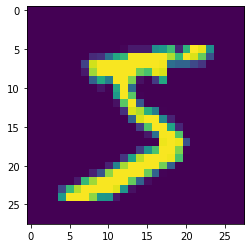

In [23]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

In [24]:
# Print a grid of images; just for the show and to feel cool
def show_images(images, labels):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1
    for image, label in zip(images, labels):
        plt.subplot(cols, rows,index)
        plt.imshow(image)
        plt.title(label)
        index += 1

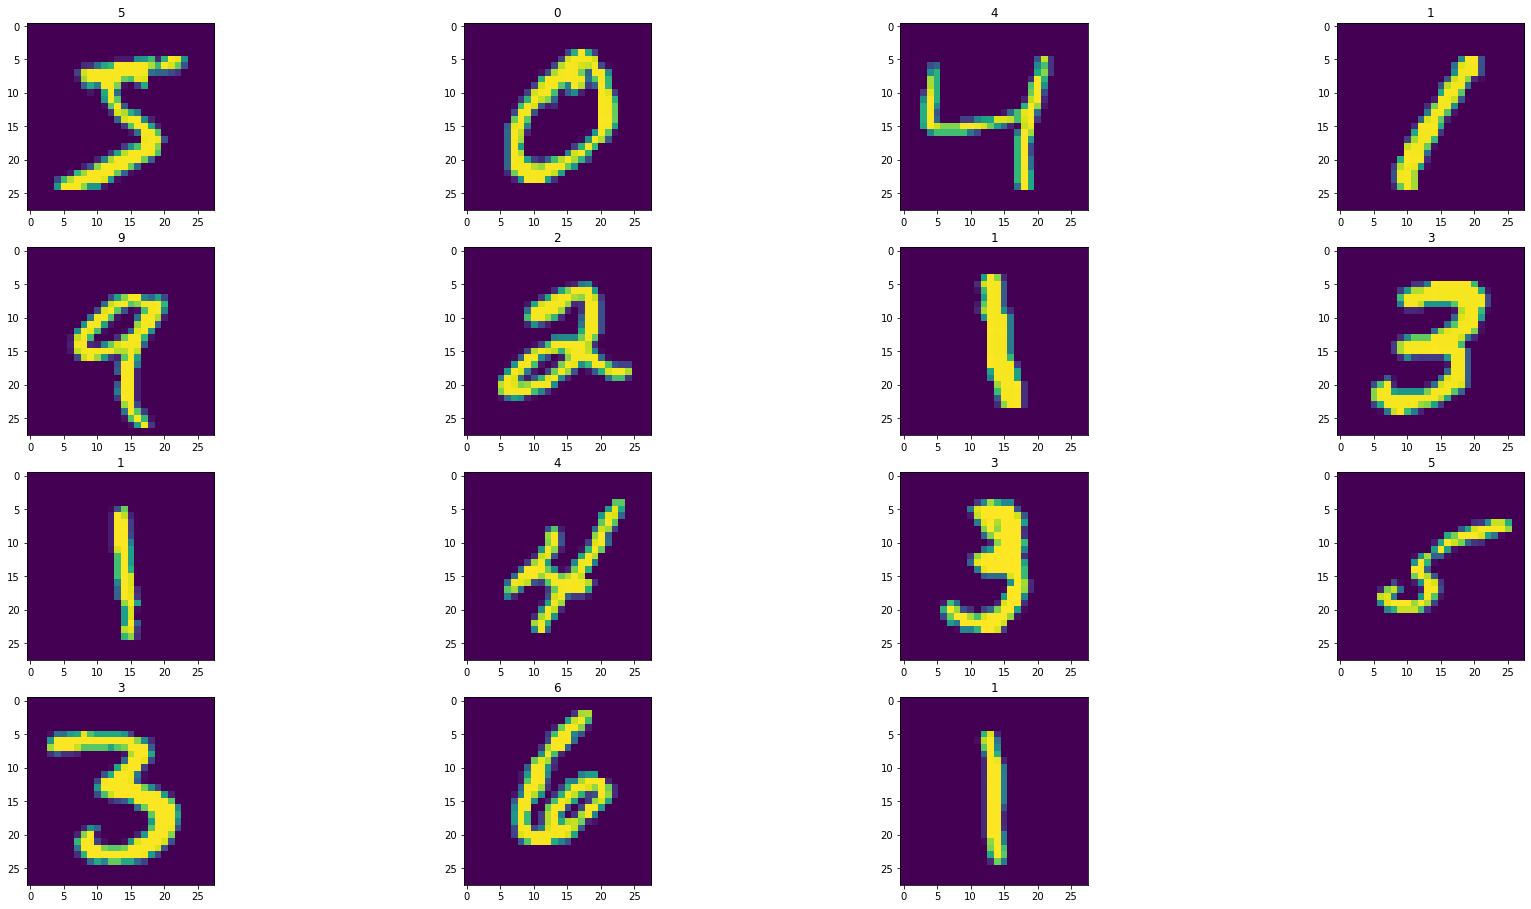

In [27]:
show_images(train_images[0:15], train_labels[0:15])

In [30]:
train_images = train_images.astype(int)
train_labels = train_labels.astype(int)

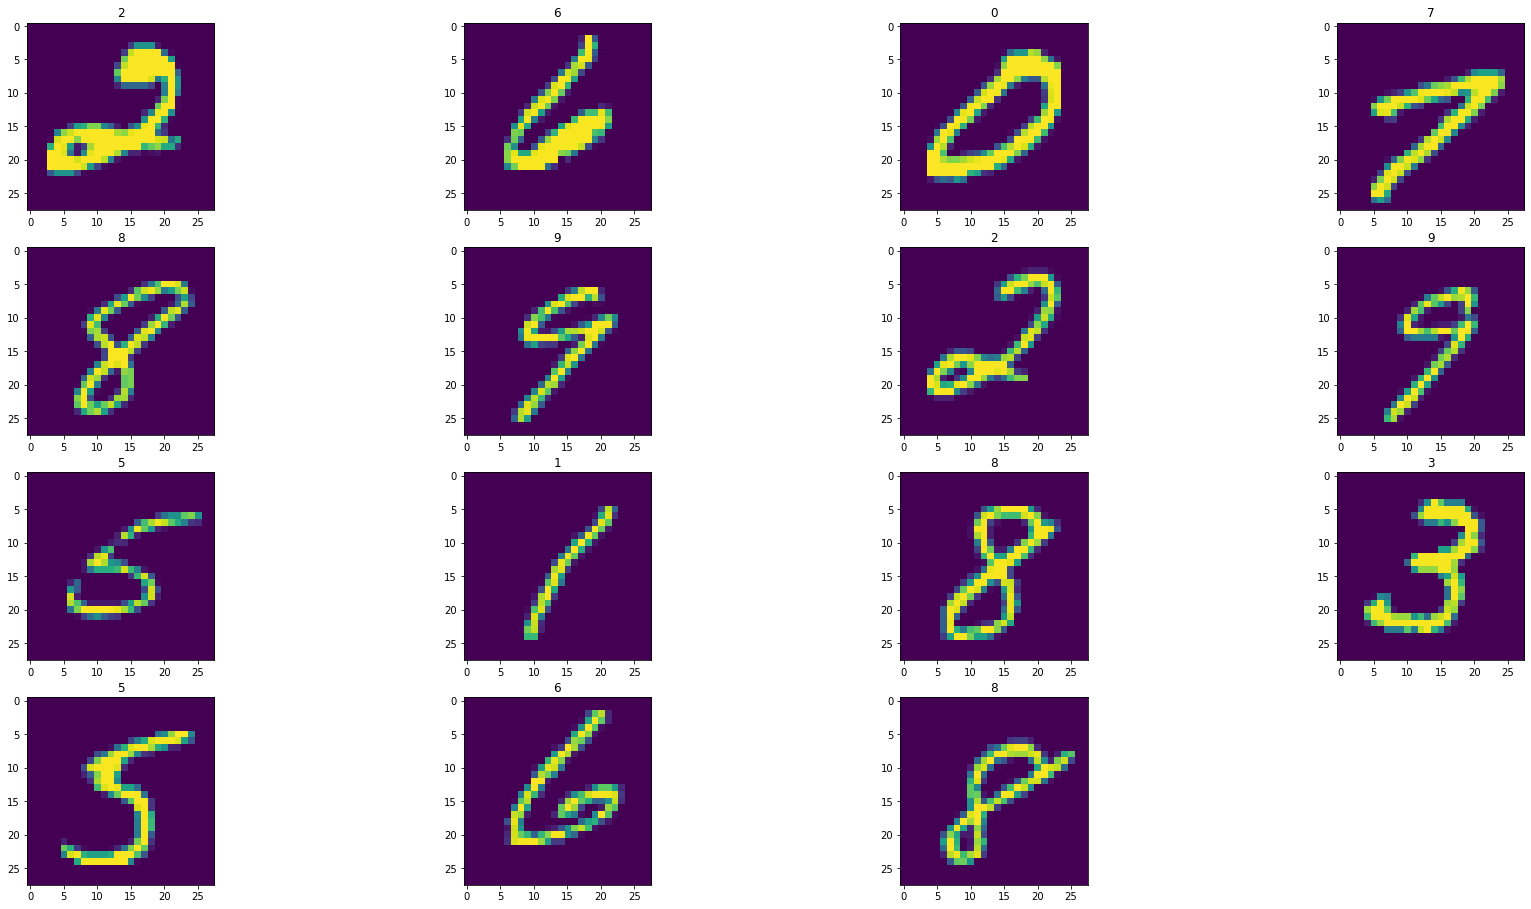

In [36]:
show_images(train_images[-15:], train_labels[-15:])

In [37]:
train_images[0].shape

(28, 28)

In [41]:
# Shuffle the training data
shuffle_index = np.random.permutation(60000)
X_train, y_train = train_images[shuffle_index], train_labels[shuffle_index]

assert X_train.shape == (60000, 28, 28)
assert y_train.shape == (60000,)

In [40]:
y_train.shape

(60000,)

# Train a binary classifier on mnist

- We will simplify the problem and try for one digit
- The binary classifier will be distinguishing between 5 and not 5
- We will use Stochastic Gradient Descent class from `sklearn`

In [44]:
y_train_5 = (y_train == 5) 

In [45]:
y_train_5.shape

(60000,)

In [46]:
y_train[0]

2

In [52]:
X_train_cp = X_train

X_train_cp = X_train_cp.reshape([60000, 784])
X_train_cp.shape

(60000, 784)

In [47]:
y_train_5[0]

False

In [53]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train_cp, y_train_5)


(60000, 28, 28)

In [59]:
sgd_clf.predict([X_train_cp[15]])

array([ True])

In [58]:
y_train_5[15]

True

# Performance Measures

- Evaluate a classifier to see how it performs
- There are various measures that can be done